In [87]:
import pandas as pd
import numpy as np
df = pd.read_csv("RBLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-11,74.930000,77.779999,70.129997,73.900002,73.900002,59629300
1,2021-03-12,72.470001,72.959999,69.110001,69.699997,69.699997,19714700
2,2021-03-15,70.019997,74.059998,66.250000,72.150002,72.150002,19549800
3,2021-03-16,73.730003,78.000000,73.180000,77.000000,77.000000,30274400
4,2021-03-17,76.029999,79.099998,74.889999,76.790001,76.790001,10054100


In [88]:
# converting the date into something the algorithim can use
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.Timestamp('2021-01-01')
df['Days_since_2021'] = (df['Date'] - start_date).dt.days
df = df.drop('Date', axis='columns')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Days_since_2021
0,74.930000,77.779999,70.129997,73.900002,73.900002,59629300,69
1,72.470001,72.959999,69.110001,69.699997,69.699997,19714700,70
2,70.019997,74.059998,66.250000,72.150002,72.150002,19549800,73
3,73.730003,78.000000,73.180000,77.000000,77.000000,30274400,74
4,76.029999,79.099998,74.889999,76.790001,76.790001,10054100,75


In [89]:
df = df.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis='columns')
df.head()

,Open,Days_since_2021
0,74.930000,69
1,72.470001,70
2,70.019997,73
3,73.730003,74
4,76.029999,75


In [90]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

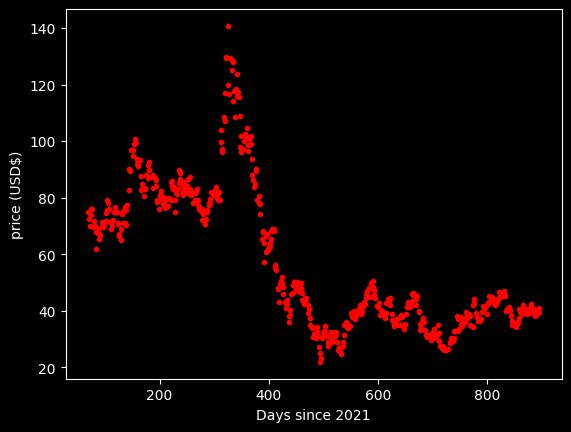

In [91]:
%matplotlib inline
plt.xlabel('Days since 2021')
plt.ylabel('price (USD$)')
plt.scatter(df.Days_since_2021,df.Open,color='red',marker='.')

In [92]:
x = df.drop('Open', axis='columns')
y = df.Open

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.05)

In [94]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=10, max_iter=10000, tol=0.1)

In [95]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5454714006698167

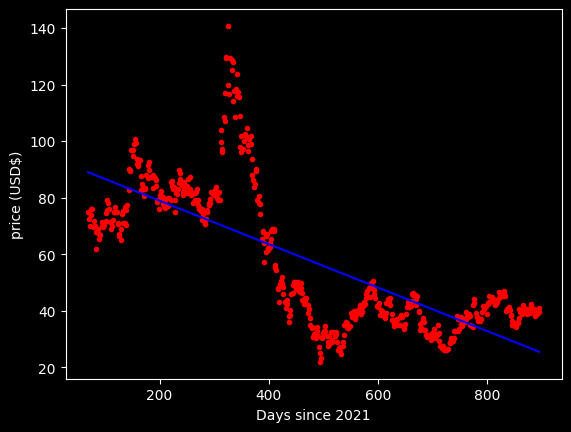

In [96]:
%matplotlib inline
plt.xlabel('Days since 2021')
plt.ylabel('price (USD$)')
plt.scatter(x['Days_since_2021'],y,color='red',marker='.')
plt.plot(x['Days_since_2021'],model.predict(x[['Days_since_2021']]), color='blue')